In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", as_frame=False)

In [2]:
X, y = mnist.data, mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(70000, 784))

In [3]:
y


array(['5', '0', '4', ..., '4', '5', '6'], shape=(70000,), dtype=object)

In [4]:

y.shape

(70000,)

In [5]:
X.shape

(70000, 784)

In [6]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

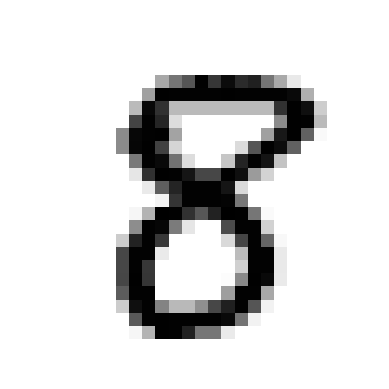

In [7]:
some_digit = X[333]
plot_digit(some_digit)

In [8]:
y[0]

'5'

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [10]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(60000, 784))

In [11]:
y_train_8 = (y_train=="8")
y_test_8 = (y_test=="8")

In [12]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_8)

SGDClassifier(random_state=42)

In [13]:
sgd_clf.predict([some_digit])

array([ True])

In [14]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_8, cv=3, scoring="accuracy")

array([0.909  , 0.9286 , 0.88285])

In [15]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_8)
print(any(dummy_clf.predict(X_train)))

False


In [16]:
cross_val_score(dummy_clf, X_train, y_train_8, cv=3, scoring='accuracy')

array([0.9025 , 0.9025 , 0.90245])

In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)

for train_index, test_index in skfolds.split(X_train, y_train_8):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_8[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_8[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.909
0.9286
0.88285


In [18]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_8, cv=3)

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_8, y_train_pred)
cm

array([[50006,  4143],
       [ 1448,  4403]])

In [20]:
y_train_perfect_predictions = y_train_8
confusion_matrix(y_train_8, y_train_perfect_predictions)

array([[54149,     0],
       [    0,  5851]])

In [21]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_8, y_train_pred)

0.515211794991809

In [22]:
recall_score(y_train_8, y_train_pred)

0.7525209365920356

In [23]:
from sklearn.metrics import f1_score
f1_score(y_train_8, y_train_pred)

0.6116552059456831

In [24]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([4795.67435018])

In [25]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [26]:
threshold = 5000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [27]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_8, cv=3, method="decision_function")

In [28]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_8, y_scores)

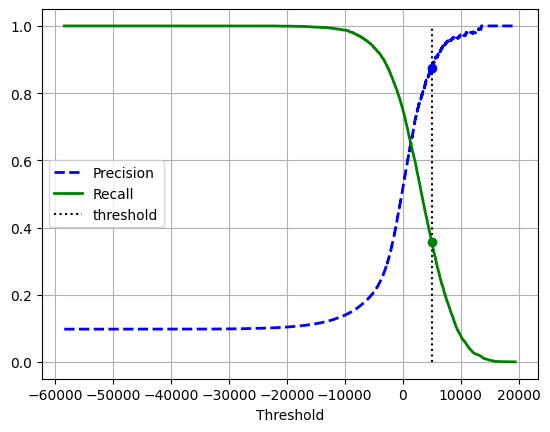

In [29]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
plt.plot(threshold, precisions[:-1][thresholds.searchsorted(threshold)], "bo")
plt.plot(threshold, recalls[:-1][thresholds.searchsorted(threshold)], "go")

plt.grid(visible=True,axis="both")
plt.xlabel("Threshold")
plt.legend()
plt.show()

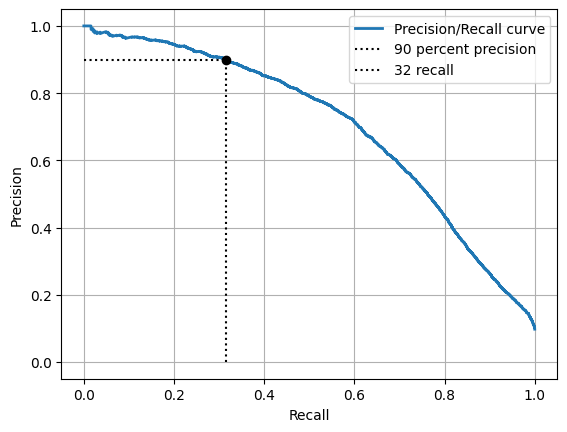

In [30]:
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.grid(True)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.hlines(y=0.9, xmin=0, xmax=0.315, color="k", linestyles="dotted", label="90 percent precision")
plt.vlines(x=0.315, ymin=0, ymax=0.9, color="k", linestyles="dotted", label="32 recall")
plt.plot(0.315, 0.9, "ko")
plt.legend()
plt.show()


In [31]:
idx_for_90_precision = (precisions>=0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

np.float64(5558.688951079276)

In [32]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [33]:
precision_score(y_train_8, y_train_pred_90)

0.9003419638495359

In [34]:
recall_at_90_precision = recall_score(y_train_8, y_train_pred_90)
recall_at_90_precision

0.3149888907878995

In [35]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_8, y_scores)

In [36]:
import numpy as np
idx_for_threshold_at_90 = np.argmin(np.abs(thresholds - threshold_for_90_precision))
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

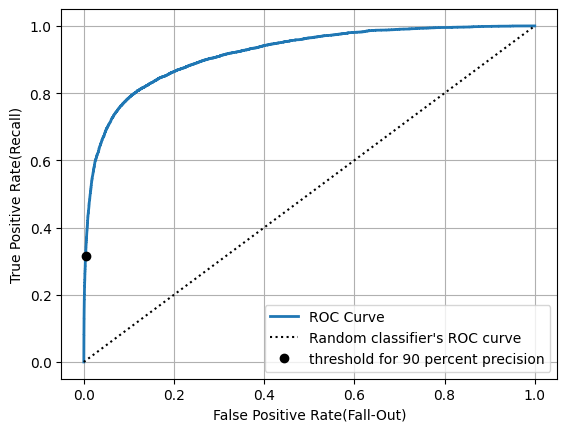

In [37]:
plt.plot(fpr, tpr, linewidth=2, label="ROC Curve")
plt.grid(True)
plt.plot([0,1], [0,1], "k:", label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="threshold for 90 percent precision")




plt.xlabel("False Positive Rate(Fall-Out)")
plt.ylabel("True Positive Rate(Recall)")
plt.legend()
plt.show()

In [38]:
idx_for_90_precision

np.int64(57953)

In [39]:
tpr_90

np.float64(0.3149888907878995)

In [40]:
fpr_90

np.float64(0.0038412528393876157)

In [41]:
threshold_for_90_precision

np.float64(5558.688951079276)

In [42]:
thresholds

array([            inf,  19409.38188472,  13556.40500738, ...,
       -22305.99623125, -22307.46108491, -58399.44549566], shape=(5714,))

In [43]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_8, y_scores)

np.float64(0.9192599874103056)

In [44]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

In [45]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_8, cv=3, method="predict_proba")
y_probas_forest[:2]

array([[0.98, 0.02],
       [1.  , 0.  ]])

In [46]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_8, y_scores_forest)

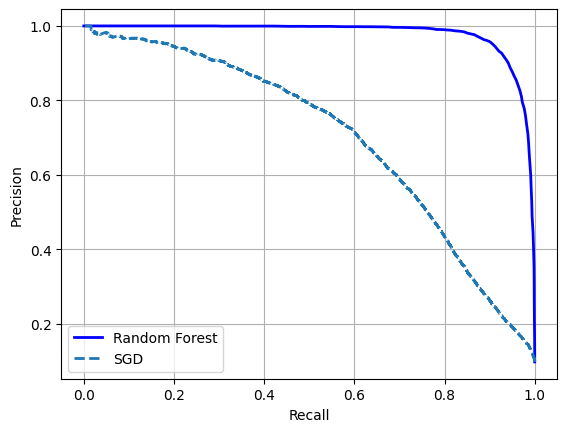

In [47]:
plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2, label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.legend()


In [48]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5
f1_score(y_train_8, y_train_pred_forest)

0.8925557847365461

In [49]:
roc_auc_score(y_train_8, y_scores_forest)

np.float64(0.9965481456893603)

In [50]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])
svm_clf.predict([some_digit])

array(['8'], dtype=object)

In [51]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.78, -0.29,  4.81,  7.26,  2.78,  8.28,  1.75,  0.7 ,  9.31,
         5.91]])

In [52]:
class_id = some_digit_scores.argmax()
class_id

np.int64(8)

In [53]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [54]:
svm_clf.classes_[class_id]

'8'

In [55]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [56]:
ovr_clf.predict([some_digit])

array(['8'], dtype='<U1')

In [57]:
len(ovr_clf.estimators_)

10

In [58]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['8'], dtype='<U1')

In [59]:
sgd_clf.decision_function([some_digit]).round()

array([[-34622., -25179.,  -5977.,  -4516., -12789.,  -2509., -32216.,
        -26186.,   4524., -12348.]])

In [60]:
cross_val_score(sgd_clf, X_train, y_train, cv=33, scoring="accuracy")

array([0.88235294, 0.85431556, 0.88894997, 0.88675096, 0.85981308,
       0.89059923, 0.8679868 , 0.87128713, 0.85313531, 0.88723872,
       0.88668867, 0.86523652, 0.86468647, 0.88393839, 0.85918592,
       0.8850385 , 0.86358636, 0.830033  , 0.86248625, 0.89768977,
       0.82343234, 0.88228823, 0.889989  , 0.85973597, 0.88008801,
       0.85643564, 0.86138614, 0.83553355, 0.88723872, 0.8630363 ,
       0.88778878, 0.89273927, 0.90759076])

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

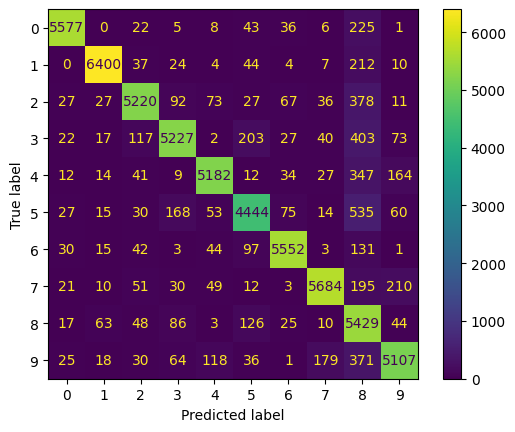

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

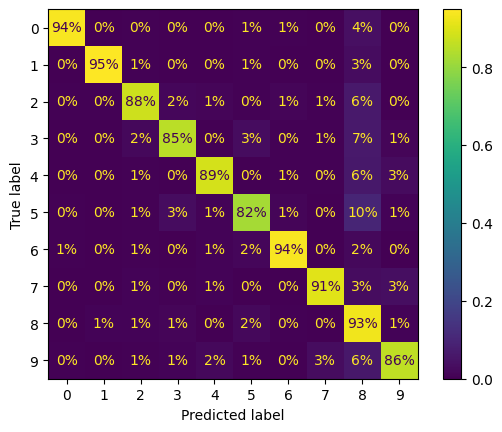

In [63]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", values_format=".0%")
plt.show()

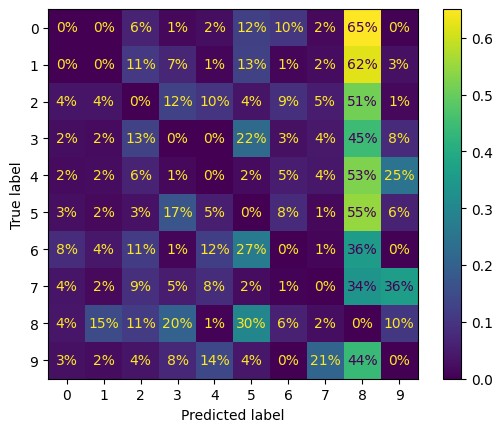

In [64]:
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=sample_weight, normalize="true", values_format=".0%")
plt.show()

In [65]:
cl_a, cl_b = '3', '8'
X_aa = X_train[(y_train == cl_a)&(y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a)&(y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b)&(y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b)&(y_train_pred == cl_b)]

In [66]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8')%2==1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [67]:
knn_clf.predict([some_digit])

array([[ True, False]])

In [68]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9764102655606048

In [69]:
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])
chain_clf.predict([some_digit])

array([[1., 0.]])

In [70]:
np.random.seed(42)
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise

In [71]:
y_train_mod = X_train
y_test_mod = X_test

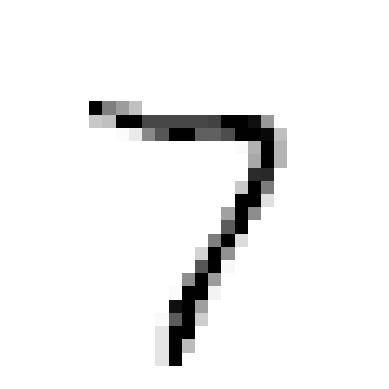

In [72]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
plt.show()